## Continuation

In [1]:
using NonlinearSolve

λ = 0:0.01:1
xguess = -1
x_vec = zeros(length(λ))
f_vec = zeros(length(λ))

for i in 1:length(λ)
    f(x, p) = @. x^3 - 2 * λ[i] * x + 1
    prob = NonlinearProblem(f, [xguess])
    sol = solve(prob)
    xguess = sol.u[1]
    x_vec[i] = sol.u[1]
end

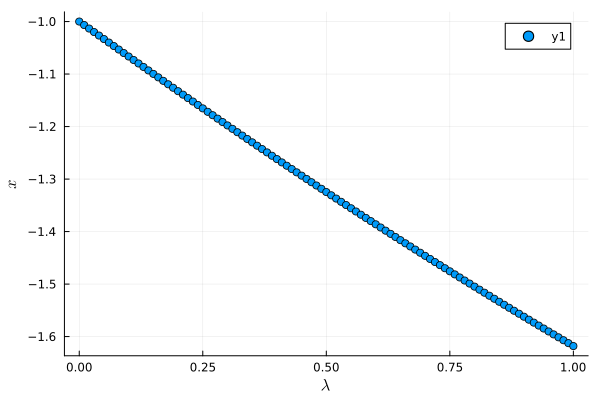

In [2]:
using Plots, LaTeXStrings

scatter(λ, x_vec, xlabel=L"$\lambda$", ylabel=L"$x$")

In [3]:
λ = 10:-0.1:1
xguesss = [1/(2λ[1]), sqrt(2λ[1]), -sqrt(2λ[1])]
x_mat = zeros(length(xguesss), length(λ))

for i in 1:length(λ)
    f(x, p) = @. x^3 - 2 * λ[i] * x + 1

    for (j, xguess) in enumerate(xguesss)
        prob = NonlinearProblem(f, [xguess])
        sol = solve(prob)
        xguesss[j] = sol.u[1]
        x_mat[j, i] = sol.u[1]
    end

end

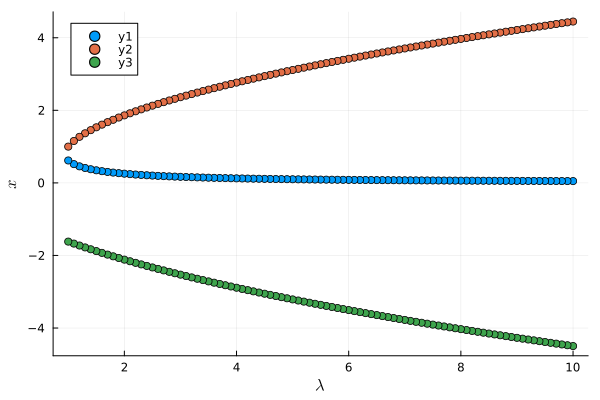

In [4]:
scatter(λ, x_mat', xlabel=L"$\lambda$", ylabel=L"$x$")

## Homotopy

In [60]:
T = 0.5; P = 0.1

v_guess = 8.0/3.0 * T/P

g(v) = @. P*v - 8.0/3.0 * T
f(v) = @. (P + 3/v^2) * (v-1.0/3.0) - 8.0/3.0 * T

λ_vec = 0.:0.01:2.0
x_vec = zeros(length(λ_vec))
for (i, λ) in enumerate(λ_vec)
    h(v, p) = λ*f(v) + (1-λ)*g(v)
    prob = NonlinearProblem(h, [v_guess])
    sol = solve(prob)
    x_vec[i] = sol.u[1]
    v_guess = sol.u[1]
end

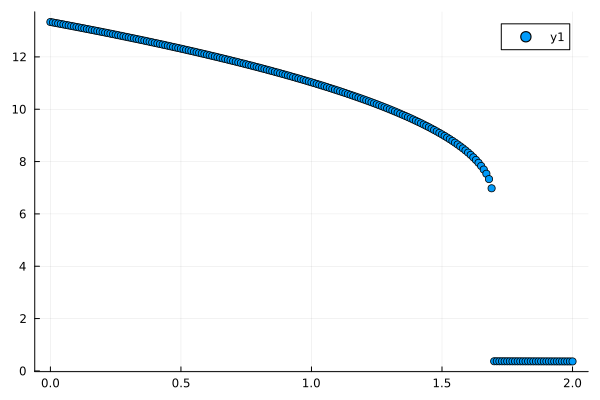

In [61]:
plt = scatter(λ_vec, x_vec)

In [62]:
λ_vec = 2.0:-0.01:0.
x_vec = zeros(length(λ_vec))
for (i, λ) in enumerate(λ_vec)
    h(v, p) = λ*f(v) + (1-λ)*g(v)
    prob = NonlinearProblem(h, [v_guess])
    sol = solve(prob)
    x_vec[i] = sol.u[1]
    v_guess = sol.u[1]
end

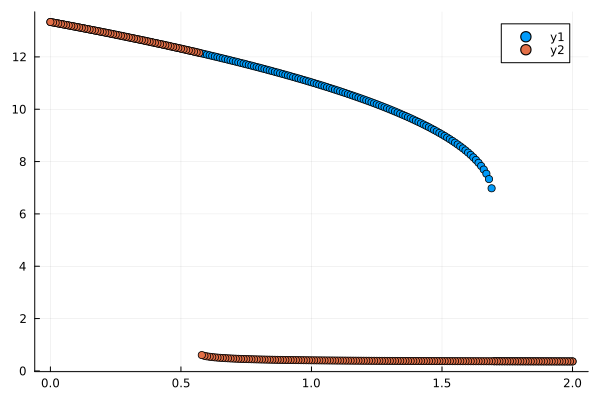

In [63]:
scatter!(plt, λ_vec, x_vec)

In [64]:
λ_vec = 2.0:-0.01:0.
x_vec = zeros(length(λ_vec))
for (i, λ) in enumerate(λ_vec)
    h(v, p) = λ*f(v) + (1-λ)*g(v)
    prob = NonlinearProblem(h, [v_guess])
    sol = solve(prob)
    x_vec[i] = sol.u[1]
    if i > 1
        if x_vec[i] - x_vec[i-1] > 2
            println(i)
            break
        end
    end
    v_guess = sol.u[1]
end

144


In [65]:
λ_vec = λ_vec[144-1]:0.01:2.0
x_vec = zeros(length(λ_vec))
for (i, λ) in enumerate(λ_vec)
    h(v, p) = λ*f(v) + (1-λ)*g(v)
    prob = NonlinearProblem(h, [v_guess])
    sol = solve(prob)
    x_vec[i] = sol.u[1]
    v_guess = sol.u[1]
end

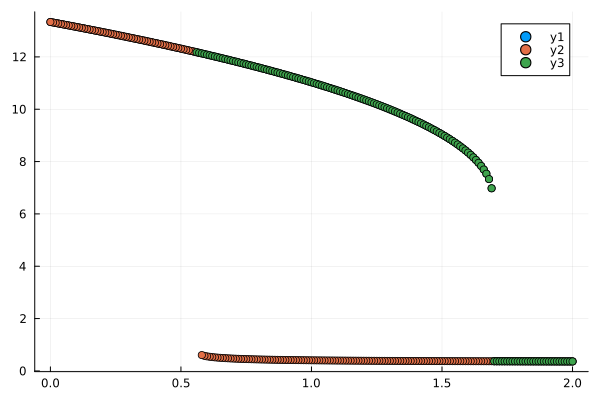

In [66]:
scatter!(plt, λ_vec, x_vec)